In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_data = pd.read_csv("ecommerce-dataset.csv", header = None)
csv_data.columns = ["category", "description"]
csv_data

,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


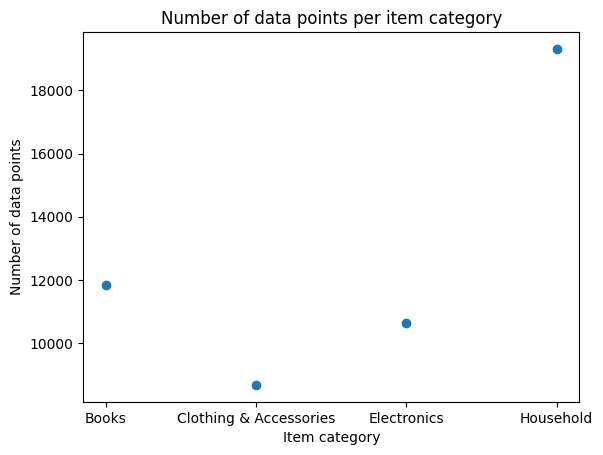

In [3]:
grouped_counts = csv_data.groupby("category").count()
grouped_counts.columns = ["count"]

plt.scatter(grouped_counts.index, grouped_counts["count"])
plt.title("Number of data points per item category")
plt.xlabel("Item category")
plt.ylabel("Number of data points")
plt.show()

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
csv_data["tokens"] = csv_data["description"].apply(lambda x: word_tokenize(str(x).lower()))
csv_data

,category,description,tokens
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,"[paper, plane, design, framed, wall, hanging, ..."
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","[saf, 'floral, ', framed, painting, (, wood, ,..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,"[saf, 'uv, textured, modern, art, print, frame..."
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...","[saf, flower, print, framed, painting, (, synt..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,"[incredible, gifts, india, wooden, happy, birt..."
...,...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...,"[strontium, microsd, class, 10, 8gb, memory, c..."
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...,"[crossbeats, wave, waterproof, bluetooth, wire..."
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,"[karbonn, titanium, wind, w4, (, white, ), kar..."
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...","[samsung, guru, fm, plus, (, sm-b110e/d, ,, bl..."


In [6]:
stop_words = set(stopwords.words("english"))
csv_data["filtered_tokens"] = csv_data["tokens"].apply(lambda x: [item for item in x if item not in stop_words and item.isalpha()])
csv_data

,category,description,tokens,filtered_tokens
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,"[paper, plane, design, framed, wall, hanging, ...","[paper, plane, design, framed, wall, hanging, ..."
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","[saf, 'floral, ', framed, painting, (, wood, ,...","[saf, framed, painting, wood, inch, x, inch, s..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,"[saf, 'uv, textured, modern, art, print, frame...","[saf, textured, modern, art, print, framed, pa..."
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...","[saf, flower, print, framed, painting, (, synt...","[saf, flower, print, framed, painting, synthet..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,"[incredible, gifts, india, wooden, happy, birt...","[incredible, gifts, india, wooden, happy, birt..."
...,...,...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...,"[strontium, microsd, class, 10, 8gb, memory, c...","[strontium, microsd, class, memory, card, blac..."
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...,"[crossbeats, wave, waterproof, bluetooth, wire...","[crossbeats, wave, waterproof, bluetooth, wire..."
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,"[karbonn, titanium, wind, w4, (, white, ), kar...","[karbonn, titanium, wind, white, karbonn, tita..."
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...","[samsung, guru, fm, plus, (, sm-b110e/d, ,, bl...","[samsung, guru, fm, plus, black, colour, black..."


In [7]:
csv_data["word_counts"] = csv_data["filtered_tokens"].apply(lambda x: Counter(x))
csv_data

,category,description,tokens,filtered_tokens,word_counts
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,"[paper, plane, design, framed, wall, hanging, ...","[paper, plane, design, framed, wall, hanging, ...","{'paper': 1, 'plane': 1, 'design': 1, 'framed'..."
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","[saf, 'floral, ', framed, painting, (, wood, ,...","[saf, framed, painting, wood, inch, x, inch, s...","{'saf': 1, 'framed': 1, 'painting': 2, 'wood':..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,"[saf, 'uv, textured, modern, art, print, frame...","[saf, textured, modern, art, print, framed, pa...","{'saf': 3, 'textured': 1, 'modern': 1, 'art': ..."
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...","[saf, flower, print, framed, painting, (, synt...","[saf, flower, print, framed, painting, synthet...","{'saf': 2, 'flower': 1, 'print': 1, 'framed': ..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,"[incredible, gifts, india, wooden, happy, birt...","[incredible, gifts, india, wooden, happy, birt...","{'incredible': 1, 'gifts': 2, 'india': 1, 'woo..."
...,...,...,...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...,"[strontium, microsd, class, 10, 8gb, memory, c...","[strontium, microsd, class, memory, card, blac...","{'strontium': 3, 'microsd': 1, 'class': 1, 'me..."
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...,"[crossbeats, wave, waterproof, bluetooth, wire...","[crossbeats, wave, waterproof, bluetooth, wire...","{'crossbeats': 1, 'wave': 1, 'waterproof': 1, ..."
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,"[karbonn, titanium, wind, w4, (, white, ), kar...","[karbonn, titanium, wind, white, karbonn, tita...","{'karbonn': 4, 'titanium': 4, 'wind': 4, 'whit..."
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...","[samsung, guru, fm, plus, (, sm-b110e/d, ,, bl...","[samsung, guru, fm, plus, black, colour, black...","{'samsung': 8, 'guru': 9, 'fm': 8, 'plus': 7, ..."


In [8]:
category_word_counts = csv_data.groupby("category")["word_counts"].agg(lambda x: dict(sum(x, Counter())))
category_word_counts

category
Books                     {'inner': 166, 'engineering': 926, 'yogi': 86,...
Clothing & Accessories    {'woopower': 1, 'pink': 360, 'baby': 1554, 'tr...
Electronics               {'dell': 296, 'laptop': 2216, 'adapter': 2536,...
Household                 {'paper': 925, 'plane': 123, 'design': 5104, '...
Name: word_counts, dtype: object

In [9]:
for category, group in csv_data.groupby("category"):
    print(f"Category: {category}")
    top_words = group["word_counts"].iloc[0].most_common(5)  # Display top 5 words
    for word, count in top_words:
        print(f"{word}: {count}")
    print("")

Category: Books
inner: 3
engineering: 3
yogi: 3
author: 3
sadhguru: 3

Category: Clothing & Accessories
size: 3
pink: 2
length: 2
due: 2
please: 2

Category: Electronics
power: 7
adapter: 6
dell: 5
laptop: 4
inspiron: 3

Category: Household
prints: 5
painting: 4
print: 3
wall: 2
office: 2



In [10]:
max_seq_length = csv_data["filtered_tokens"].apply(len).max()
csv_data['padded_tokens'] = csv_data['filtered_tokens'].apply(lambda x: ",".join(x + [""] * (max_seq_length - len(x))))
csv_data.to_csv("./tokenised-dataset.csv")
csv_data

,category,description,tokens,filtered_tokens,word_counts,padded_tokens
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,"[paper, plane, design, framed, wall, hanging, ...","[paper, plane, design, framed, wall, hanging, ...","{'paper': 1, 'plane': 1, 'design': 1, 'framed'...","paper,plane,design,framed,wall,hanging,motivat..."
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","[saf, 'floral, ', framed, painting, (, wood, ,...","[saf, framed, painting, wood, inch, x, inch, s...","{'saf': 1, 'framed': 1, 'painting': 2, 'wood':...","saf,framed,painting,wood,inch,x,inch,special,e..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,"[saf, 'uv, textured, modern, art, print, frame...","[saf, textured, modern, art, print, framed, pa...","{'saf': 3, 'textured': 1, 'modern': 1, 'art': ...","saf,textured,modern,art,print,framed,painting,..."
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...","[saf, flower, print, framed, painting, (, synt...","[saf, flower, print, framed, painting, synthet...","{'saf': 2, 'flower': 1, 'print': 1, 'framed': ...","saf,flower,print,framed,painting,synthetic,inc..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,"[incredible, gifts, india, wooden, happy, birt...","[incredible, gifts, india, wooden, happy, birt...","{'incredible': 1, 'gifts': 2, 'india': 1, 'woo...","incredible,gifts,india,wooden,happy,birthday,u..."
...,...,...,...,...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...,"[strontium, microsd, class, 10, 8gb, memory, c...","[strontium, microsd, class, memory, card, blac...","{'strontium': 3, 'microsd': 1, 'class': 1, 'me...","strontium,microsd,class,memory,card,black,mobi..."
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...,"[crossbeats, wave, waterproof, bluetooth, wire...","[crossbeats, wave, waterproof, bluetooth, wire...","{'crossbeats': 1, 'wave': 1, 'waterproof': 1, ...","crossbeats,wave,waterproof,bluetooth,wireless,..."
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,"[karbonn, titanium, wind, w4, (, white, ), kar...","[karbonn, titanium, wind, white, karbonn, tita...","{'karbonn': 4, 'titanium': 4, 'wind': 4, 'whit...","karbonn,titanium,wind,white,karbonn,titanium,w..."
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...","[samsung, guru, fm, plus, (, sm-b110e/d, ,, bl...","[samsung, guru, fm, plus, black, colour, black...","{'samsung': 8, 'guru': 9, 'fm': 8, 'plus': 7, ...","samsung,guru,fm,plus,black,colour,black,compac..."


Prediction Part

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [12]:
data_raw = pd.read_csv("./tokenised-dataset.csv")
categories = data_raw["category"]
tokens = data_raw["padded_tokens"].apply(lambda x: x.split(","))
tokens.size, categories.size

(50425, 50425)

In [13]:
padded_token_size = len(tokens[0])
padded_token_size

4266

In [14]:
tokenizer = Tokenizer(num_words=padded_token_size, oov_token='<OOV>')
tokenizer.fit_on_texts(tokens.apply(lambda x: ' '.join(map(str, x))))
sequences = tokenizer.texts_to_sequences(tokens.apply(lambda x: ' '.join(map(str, x))))
padded_sequences = pad_sequences(sequences, maxlen=padded_token_size, padding='post')
padded_sequences

array([[ 248, 3358,   14, ...,    0,    0,    0],
       [   1,    1, 1375, ...,    0,    0,    0],
       [   1, 2757,  216, ...,    0,    0,    0],
       ...,
       [   1,    1, 1584, ...,    0,    0,    0],
       [ 726, 1726,  531, ...,    0,    0,    0],
       [   1, 2368, 1559, ...,    0,    0,    0]], dtype=int32)

In [15]:
le = LabelEncoder()
category_labels = le.fit_transform(categories)
category_labels = pd.DataFrame(category_labels)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, category_labels, test_size=0.2, random_state=42, shuffle=True)
len(X_train), len(y_train)

(40340, 40340)

In [16]:
model = tf.keras.Sequential()
model.add(Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim = 32, input_length = padded_token_size))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4266, 32)          1943808   
                                                                 
 global_average_pooling1d (  (None, 32)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 1944404 (7.42 MB)
Trainable params: 1944404 (7.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = tf.metrics.SparseCategoricalAccuracy())

In [18]:
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
X_train_tensor

<tf.Tensor: shape=(40340, 4266), dtype=float32, numpy=
array([[1.000e+00, 2.280e+02, 1.861e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 4.180e+02, 1.873e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.395e+03, 1.969e+03, 1.920e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 3.400e+01, 5.250e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 2.227e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.792e+03, 3.060e+02, 3.730e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], dtype=float32)>

In [19]:
model.fit(X_train_tensor, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1009/1009 [==============================] - 60s 58ms/step - loss: 1.3114 - sparse_categorical_accuracy: 0.4008 - val_loss: 1.2161 - val_sparse_categorical_accuracy: 0.4556
Epoch 2/10
1009/1009 [==============================] - 56s 56ms/step - loss: 1.0272 - sparse_categorical_accuracy: 0.5562 - val_loss: 0.8595 - val_sparse_categorical_accuracy: 0.6232
Epoch 3/10
1009/1009 [==============================] - 59s 58ms/step - loss: 0.7213 - sparse_categorical_accuracy: 0.7784 - val_loss: 0.6130 - val_sparse_categorical_accuracy: 0.8458
Epoch 4/10
1009/1009 [==============================] - 58s 58ms/step - loss: 0.5254 - sparse_categorical_accuracy: 0.8777 - val_loss: 0.5533 - val_sparse_categorical_accuracy: 0.7827
Epoch 5/10
1009/1009 [==============================] - 57s 57ms/step - loss: 0.4227 - sparse_categorical_accuracy: 0.9045 - val_loss: 0.4127 - val_sparse_categorical_accuracy: 0.9126
Epoch 6/10
1009/1009 [==============================] - 53s 53ms/step - loss: 0.

In [20]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = np.sum(y_pred == np.array(y_test).reshape(len(y_test))) / len(y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

316/316 [==============================] - 3s 9ms/step
Accuracy: 92.68%


In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

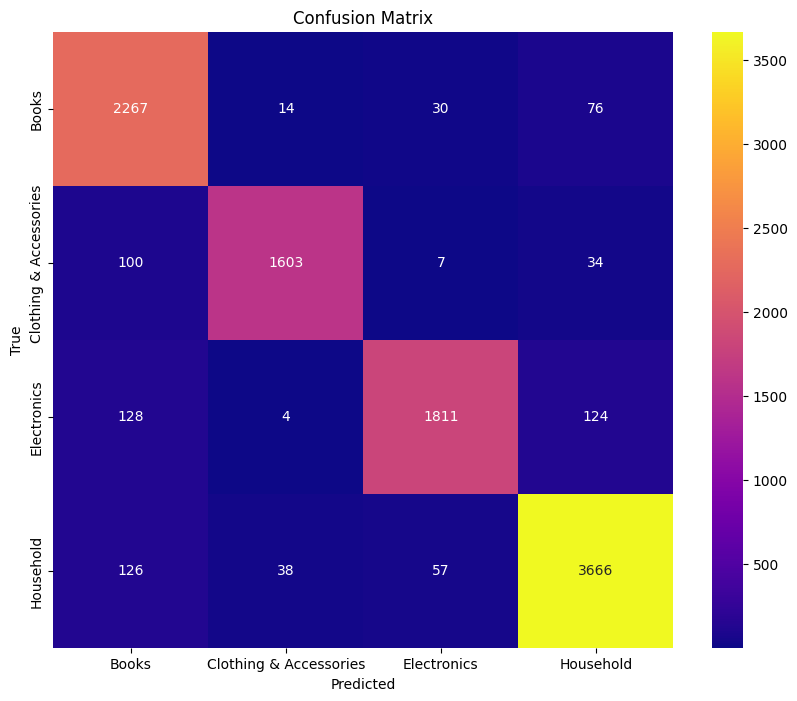

In [22]:
conf_matrix = confusion_matrix(np.array(y_test).reshape(len(y_test)), y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
model.save("./model.keras")